In [103]:
import os
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from textScrapper import TextScrapper
from PyPDF2 import PdfReader
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path


In [2]:
# exemple path file ../data/sncf_vinci_ifg_62/00086570-002601E-B007-20220323-R-VEN.pdf
class fileTextManager():
    
    def __init__ (self):
        self.current_DB= "sncf_veolia_ifg_21"
        
        
    def cleanText(self, text):
        char="abcdefghijklmnopqrstuvwxyzéèàçôùëïüûâùäîê-. "
        if isinstance(text, list):
            lowercaseText= text[0].lower()
            
        elif isinstance(text, str):
            lowercaseText= [text][0].lower()
            
        cleanText = ""
        lowercaseText = re.sub("[\(\[].*?[\)\]]", "", lowercaseText)
        for letter in lowercaseText:
            if letter in char:
                cleanText = cleanText + letter
        return cleanText

    def getExtension(self, file):
        filename, file_extension = os.path.splitext(file)
        return file_extension
    
    
    def getFileText(self, file):
        textScrap = TextScrapper()
        typeDocumentNumber=[]
        match file["mimeType"]:
            case "application/pdf":
                try:
                    reader = PdfReader(f"/Volumes/DD Thibault/sncf_DB/doc/{self.current_DB}/{file['KidFile']}")
                    if reader.is_encrypted:
                        fullText = textScrap.getTextCryptedPdf(f"/Volumes/DD Thibault/sncf_DB/doc/{self.current_DB}/{file['KidFile']}")

                        fullText = self.cleanText(fullText)
                    else:
                        fullText = textScrap.getTextPdf(f"/Volumes/DD Thibault/sncf_DB/doc/{self.current_DB}/{file['KidFile']}")

                        fullText = self.cleanText(fullText)
                except:
                    fullText=''
                
                #print (f"{repr(fullText)} file print")
                
               
                return fullText
            case 'application/vnd.ms-excel':
                
                fullText = textScrap.getTextExcel(f"/Volumes/DD Thibault/sncf_DB/doc/{self.current_DB}/{file['KidFile']}")
                return fullText

            case 'application/vnd.openxmlformats-officedocument.wordprocessingml.document':
                fullText = textScrap.getTextWord(f"/Volumes/DD Thibault/sncf_DB/doc/{self.current_DB}/{file['KidFile']}")
                return fullText
            
            #case 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet':
                #fullText = textScrap.getTextWord(f"/Volumes/DD Thibault/sncf_DB/doc/engie/{file['KidFile']}")
                #return fullText
            #case 'image/jpeg':
                #return 2

            case _:
                return 'document type not supported'
                #raise ValueError('document type not supported')   # 0 is the default case if x is not found
    

In [3]:
csvPath = "/Volumes/DD Thibault/sncf_DB/doc/sncf_veolia_ifg_21.csv"
scrapper = TextScrapper()
csv = scrapper.getTextCsv(csvPath)
dictPdfWord=[]
fileManager = fileTextManager()
print(len(csv))
print(csv.iloc[4])
orderedCorpus = {}
dictType={}
lenth = 0
types = []
pdf=0
word=0
img=0

for row in tqdm((csv.iloc)):
    if row["mimeType"] == "application/pdf" or row["mimeType"] == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        contentFile = fileManager.getFileText(row)
        if row['KidDocumentClass'] in dictType:
            dictType[row['KidDocumentClass']].append(contentFile)
        else:
            dictType[row['KidDocumentClass']]=[]
            dictType[row['KidDocumentClass']].append(contentFile)


        #TODO charge content by batch


        


2600
fileName                   publipostage-5.pdf
KidDocumentClass       K_NODE;cATERTETANCHGAZ
fileSize                               461856
mimeType                      application/pdf
owner               PROFIL;0001025M033F3QBT06
creationDate              2021-01-27 11:10:04
KidFile             K_NODE;0023285M2T7LKL8C0S
Name: 4, dtype: object


2600it [07:10,  6.04it/s]


In [4]:
data = {}
for key in dictType:
    
    for file in dictType[key]:

        dictType[key] = list(filter(None, dictType[key]))
        
    
    if len(dictType[key]) >= 20:
        if key in data:
            data[key]["data"], data[key]["test"]= train_test_split(dictType[key],test_size=0.20)
        else :
            data[key] = {"data":[], "test":[]}
            data[key]["data"], data[key]["test"]= train_test_split(dictType[key],test_size=0.20)


In [163]:

def trainModel():
    vecsData = {}
    for types in data: 
        vectorizer = TfidfVectorizer()
        if types in vecsData:
            vectors = vectorizer.fit_transform(data[types]["data"])
            mean = np.mean(vectors.toarray(), axis=0)
            vecsData[types]["mean"] = mean
            vecsData[types]["vectorizer"] = vectorizer
            
            
                
        else:
            vecsData[types] = {}
            vectors = vectorizer.fit_transform(data[types]["data"])
            mean = np.mean(vectors.toarray(), axis=0)
            vecsData[types]["mean"] = mean
            vecsData[types]["vectorizer"] = vectorizer
        break
    
    return vecsData
        
    

In [113]:
trainModel()

{'K_NODE;cATERTETANCHGAZ': {'mean': array([0.04324365, 0.00051433, 0.00070367, 0.00144109, 0.00307039,
         0.04321789, 0.00069701, 0.00061729, 0.00142885, 0.0337396 ,
         0.00080178, 0.00068447, 0.00068804, 0.00068689, 0.0029246 ,
         0.00200138, 0.0056499 , 0.0056499 , 0.03377606, 0.00182023,
         0.00070001, 0.0379467 , 0.0056499 , 0.0019837 , 0.0056499 ,
         0.00080519, 0.00244457, 0.00137759, 0.00076634, 0.04321789,
         0.01757289, 0.00075153, 0.00207295, 0.01239569, 0.00955953,
         0.00198173, 0.00068804, 0.04321789, 0.00404105, 0.00137759,
         0.0379467 , 0.00144723, 0.00068689, 0.00068647, 0.00129294,
         0.00667381, 0.00073834, 0.00584744, 0.01106955, 0.00078602,
         0.00068447, 0.00143449, 0.00385826, 0.00508043, 0.0056499 ,
         0.00079992, 0.0337396 , 0.04321789, 0.00146554, 0.00065855,
         0.00078144, 0.0056499 , 0.00074954, 0.0013795 , 0.0056499 ,
         0.00079322, 0.0056499 , 0.00480345, 0.00409884, 0.00452264,


In [168]:
def compareDoc(doc):
    tamp = -1
    vecsData = trainModel()
    similarities = []
    for types in vecsData:
        similarity = np.dot(vecsData[types]["vectorizer"].transform([doc]).toarray()[0], vecsData[types]["mean"])/ (np.linalg.norm(vecsData[types]["vectorizer"].transform([doc]).toarray()[0]) * np.linalg.norm(vecsData[types]["mean"]))
        
        if tamp < similarity:
            tamp = similarity
            sim = [types, similarity]    
    return sim

In [171]:

compareDoc(data["K_NODE;cATERTETANCHGAZ"]["data"][0])

['K_NODE;cATERTETANCHGAZ', 0.9035188683086522]

In [101]:
lenth = 0
lenthTest=0
for types in data:
    lenth = lenth + len(data[types]["data"])
    lenthTest = lenthTest + len(data[types]["test"])
    
print(lenth)
print(lenthTest)

1966
498


In [170]:
fail= 0
succes=0
failList= []
for types in tqdm(data):
    for file in data[types]["test"]:
        
        simFile = compareDoc(file)
        if simFile[0] == types:
            succes +=1
        else:
            fail+=1
            failList.append(simFile[0])
            
print(fail)
print(succes)
print(f"{100-(fail*100/(fail+succes))} % reliable")


100%|██████████████████████████████████████████████████████████████████████████████| 12/12 [00:25<00:00,  2.09s/it]

401
97
19.47791164658635 % reliable


In [15]:
# mise en place de pickle pour save les matrice des model tfidf
print(data["K_NODE;cATERTETANCHGAZ"]["data"][0])
simFile = compareDocument(data["K_NODE;cATERTETANCHGAZ"]["data"][0])

c - réseaux gaz en xxxx version rapport de visite réglementaire des réseaux gazsnut-bat   f-merrey  p gare b -batiment voyageursdescription du bien  equipement  d-sgaz--cuve de stockage et circuit gazn igo   n ot   date de visite    technicien   senebald samuelspecifications dutilisationune remarque particulière nentrant pas dans une case observation doit être indiquée à la fin de la page.etatsatisfaisanten serviceobservations  actions points de controlei. debut de linterventionetat de léquipement à larrivée sur site ii. securites des personnes a. securites passivesmanoeuvre de la vanne gaz darrêt durgencesi un organe nest pas installé alors que la réglementation lexige il faut cocher dune correction à programmer et non sans objet.une correction immédiate ou à programmer donne lieu à une observation.sans objetcontrôle du bon fonctionnement de la détection automatique gazcontrôle des reports dalarmecontrôle et nettoyage des filtres manomètres purge dair satisfaisantsans objetsatisfaisan

In [11]:
vectorizer = TfidfVectorizer()

vecs = vectorizer.fit_transform(data["K_NODE;cATERTFLUIDO"]["data"] + data["K_NODE;cATERTFLUIDO"]["test"])
corr_matrix = ((vecs * vecs.T).A)
print(corr_matrix)
dim = len(data["K_NODE;cATERTFLUIDO"]["data"])
print(dim)
similarity = corr_matrix[dim:, :dim].mean() 
print(similarity)


[[1.         0.87619054 0.90638486 ... 0.87575332 0.88377529 0.90309591]
 [0.87619054 1.         0.90194588 ... 0.89867386 0.88121014 0.89149444]
 [0.90638486 0.90194588 1.         ... 0.89311348 0.91656203 0.92146293]
 ...
 [0.87575332 0.89867386 0.89311348 ... 1.         0.87374231 0.88504671]
 [0.88377529 0.88121014 0.91656203 ... 0.87374231 1.         0.90287938]
 [0.90309591 0.89149444 0.92146293 ... 0.88504671 0.90287938 1.        ]]
109
0.8904389841707024


In [61]:
for i, doc in enumerate(tfm_docs):
    
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=["term", "score"])\
                                .sort_values(by="score", ascending=False)\
                                .reset_index(drop=True)
print(one_doc_as_df)
vectorizer.get_feature_names()[-10:-1]

NameError: name 'tfm_docs' is not defined

In [30]:
tf_df_reduc = one_doc_as_df.iloc[1:20, :]

[Text(0, 0, 'smart'),
 Text(1, 0, 'uuw'),
 Text(2, 0, 'bbb'),
 Text(3, 0, 'loupe'),
 Text(4, 0, 'lg'),
 Text(5, 0, 'inverter'),
 Text(6, 0, 'leaz'),
 Text(7, 0, 'seeker'),
 Text(8, 0, 'total'),
 Text(9, 0, 'grondin'),
 Text(10, 0, 'ii'),
 Text(11, 0, 'place'),
 Text(12, 0, 'champ'),
 Text(13, 0, 'texte'),
 Text(14, 0, 'case'),
 Text(15, 0, 'slider'),
 Text(16, 0, 'compteur'),
 Text(17, 0, 'cocher'),
 Text(18, 0, 'igorigènes')]

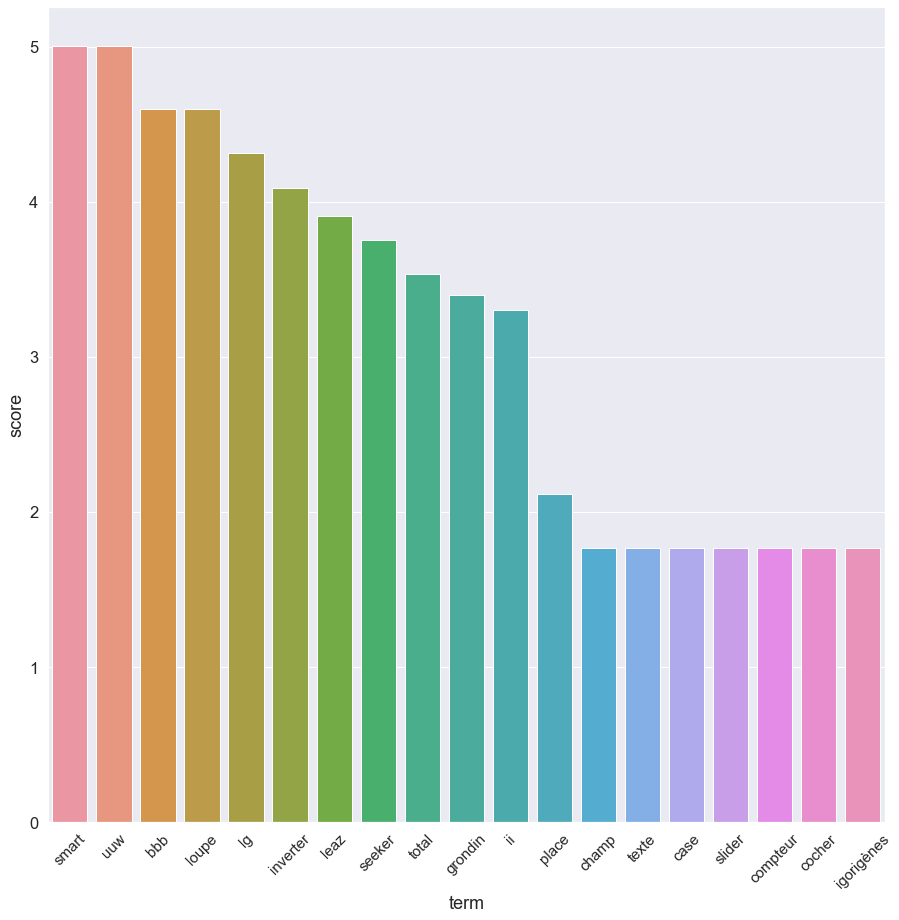

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.set(font_scale=1.5)
barplot = sns.barplot(x="term",
                      y="score",
                      data=tf_df_reduc)

barplot.set_xticklabels(barplot.get_xticklabels(), 
                        rotation=45,
                        size = 15)


In [9]:
string = "coucou"
liste=[3,2,1]
print(type(liste))

if type(liste)=="list":
    print("true")
else:
    print("false")



<class 'list'>
false


In [100]:

def compareDocument(doc):
    
    vectorizer = TfidfVectorizer()
    tamp = -1
    for types in data:
        vectorizer.fit(data[types]["data"])
        vecs = vectorizer.transform(data[types]["data"])
        new_vec = vectorizer.transform([doc])
        default_vec = vectorizer.fit_transform(data[types]["data"]+[doc])
        print(vecs.shape)
        print("__________________________")
        print(new_vec.shape)
        print("__________________________")
        print(default_vec.shape)
        
        corr_matrix = (new_vec * new_vec.T)
        print(corr_matrix)
        dim = len(data[types]["data"])
        print(corr_matrix)
        similarity = corr_matrix[dim:, :dim].mean()
        print(similarity)
        break
        if tamp < similarity:
            tamp = similarity
            sim = [types, similarity]        
    return sim
    